# Extração de dados e análise exploratória

Neste notebook é feita uma análise inicial dos dados presentes nos datasets Airbnb - Rio de Janeiro.

## Importando bibliotecas

In [1]:
import pandas as pd
import json
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(7.7,7.7)}) # graph size

In [2]:
%cd /mnt/ced80f5d-ab66-4e0c-ad3f-f8f34fb3be44/Dropbox/novos/CognitivoDesafio/Dados
%ls

/mnt/ced80f5d-ab66-4e0c-ad3f-f8f34fb3be44/Dropbox/novos/CognitivoDesafio/Dados
calendar.csv.gz        listings.csv            reviews.csv
dados_airbnb.png       listings.csv.gz         reviews.csv.gz
data_for_modeling.csv  neighbourhoods.csv      reviews_with_language.csv
links.txt              neighbourhoods.geojson


## Abrindo os arquivos e colocando o conteúdo de cada em um dataframe diferente

In [4]:
files_list_original = []

for name in glob.glob('*.csv.gz'):
    files_list_original.append(name)
    
print(files_list_original)

['listings.csv.gz', 'reviews.csv.gz', 'calendar.csv.gz']


In [5]:
df_list = []

for file_name in files_list_original:
    col_name = file_name.split('.')[0]
    print(col_name)
    
    
    var_name = 'df_{}'.format(col_name)
    
    print(var_name)
    globals()[var_name] = pd.read_csv(file_name)
    print('shape', globals()[var_name].shape)

listings
df_listings
shape (26615, 74)
reviews
df_reviews
shape (323274, 6)
calendar
df_calendar
shape (9685126, 7)


## Visão geral dos dados

In [6]:
# Mostrar todas as columas

pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_rows', 30)

### Arquivo 'listings.csv.gz'

In [8]:
# Visão geral do dataframe

print(df_listings.shape)
df_listings.head()

(26615, 74)


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20210222161029,2021-02-23,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, State of Rio de Janeiro, Brazil",I am a journalist/writer. Lived for 15 years...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/67b13...,https://a0.muscache.com/im/pictures/user/67b13...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.96592,-43.17896,Entire condominium,Entire home/apt,5,NaN,1 bath,2.0,2.0,"[""Air conditioning"", ""Essentials"", ""Luggage dr...",$221.00,5,180,5.0,5.0,1125.0,1125.0,5.0,1125.0,NaN,t,0,8,38,304,2021-02-23,260,12,2,2010-07-15,2021-02-08,94.0,9.0,9.0,10.0,10.0,10.0,9.0,NaN,t,1,1,0,0,2.01
1,24480,https://www.airbnb.com/rooms/24480,20210222161029,2021-02-23,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,"The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/11955612/b28e...,99249,https://www.airbnb.com/users/show/99249,Goya,2010-03-26,"Rio de Janeiro, Rio de Janeiro, Brazil",Welcome to Rio!\r\nI am a filmmaker and a tea...,within a few hours,100%,NaN,f,https://a0.muscache.com/im/pictures/user/6b404...,https://a0.muscache.com/im/pictures/user/6b404...,Ipanema,0.0,0.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Rio de Janeiro, Brazil",Ipanema,NaN,-22.98570,-43.20193,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Extra pillows and blankets"", ""Air conditioni...",$307.00,3,90,3.0,3.0,90.0,90.0,3.0,90.0,NaN,t,0,0,0,10,2021-02-23,85,0,0,2010-09-26,2018-02-14,95.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,f,1,1,0,0,0.67
2,25026,https://www.airbnb.com/rooms/25026,20210222161029,2021-02-23,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/3003965/68ebb...,3746246,https://www.airbnb.com/users/show/3746246,Ghizlane,2012-10-03,"Rio de Janeiro, Rio de Janeiro, Brazil","French girl ""lost in Brazilian translation"" si...",within a few hours,97%,78%,f,https://a0.muscache.com/im/pictures/user/fffed...,https://a0.muscache.com/im/pictures/user/fffed...,Ipanema,11.0,11.0,"['phone', 'reviews', 'jumio', 'offline_governm...",t,f,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.97712,-43.19045,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,2.0,"[""Elevator"", ""Dedicated workspace"", ""Kitche

O arquivo 'listings.csv.gz' apresenta informações gerais sobre as acomodações disponíveis na plataforma, como detalhes da acomodação em si, do *host*, do bairro e das avaliações feitas. 

In [9]:
df_listings.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26615 entries, 0 to 26614
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26615 non-null  int64  
 1   listing_url                                   26615 non-null  object 
 2   scrape_id                                     26615 non-null  int64  
 3   last_scraped                                  26615 non-null  object 
 4   name                                          26586 non-null  object 
 5   description                                   25160 non-null  object 
 6   neighborhood_overview                         14314 non-null  object 
 7   picture_url                                   26615 non-null  object 
 8   host_id                                       26615 non-null  int64  
 9   host_url                                      26615 non-null 

In [103]:
df_listings_isnull_list = df_listings.isnull().sum()#.to_frame('nulls')
for key,value in df_listings_isnull_list.iteritems():
    print(key,":",value)

id : 0
listing_url : 0
scrape_id : 0
last_scraped : 0
name : 29
description : 1455
neighborhood_overview : 12301
picture_url : 0
host_id : 0
host_url : 0
host_name : 24
host_since : 24
host_location : 107
host_about : 13720
host_response_time : 8016
host_response_rate : 8016
host_acceptance_rate : 9541
host_is_superhost : 24
host_thumbnail_url : 24
host_picture_url : 24
host_neighbourhood : 11271
host_listings_count : 24
host_total_listings_count : 24
host_verifications : 0
host_has_profile_pic : 24
host_identity_verified : 24
neighbourhood : 12301
neighbourhood_cleansed : 0
neighbourhood_group_cleansed : 26615
latitude : 0
longitude : 0
property_type : 0
room_type : 0
accommodates : 0
bathrooms : 26615
bathrooms_text : 72
bedrooms : 1746
beds : 252
amenities : 0
price : 0
minimum_nights : 0
maximum_nights : 0
minimum_minimum_nights : 84
maximum_minimum_nights : 84
minimum_maximum_nights : 84
maximum_maximum_nights : 84
minimum_nights_avg_ntm : 84
maximum_nights_avg_ntm : 84
calendar_u

Podemos notar que as features 'neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated' e 'license' não apresentam dado algum. Cerca de 70% das features apresentam mais de 90% de dados. 

In [11]:
# Transformação da feature 'price' em uma feature numérica 'price_new'

def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

df_listings['price_new'] = df_listings['price'].apply(clean_currency).astype('float')


print(df_listings['price_new'])

0         221.0
1         307.0
2         160.0
3         273.0
4         135.0
          ...  
26610      94.0
26611     141.0
26612    2500.0
26613     160.0
26614     316.0
Name: price_new, Length: 26615, dtype: float64


In [12]:
# Transformação da feature 'bathrooms_text' em uma feature numérica 'bathrooms_text_new'

df_listings["bathrooms_text_new"] = df_listings["bathrooms_text"].str.extract("(\d*\.?\d+)", expand=True).astype('float')
print(df_listings['bathrooms_text_new'])

0        1.0
1        1.0
2        1.0
3        1.5
4        1.0
        ... 
26610    NaN
26611    1.0
26612    3.0
26613    2.5
26614    1.0
Name: bathrooms_text_new, Length: 26615, dtype: float64


In [13]:
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_new,bathrooms_text_new
count,2.661500e+04,2.661500e+04,2.661500e+04,26591.000000,26591.000000,0.0,26615.000000,26615.000000,26615.000000,0.0,24869.000000,26363.000000,26615.000000,2.661500e+04,26531.000000,26531.000000,2.653100e+04,2.653100e+04,26531.000000,2.653100e+04,0.0,26615.000000,26615.000000,26615.000000,26615.000000,26615.000000,26615.000000,26615.000000,16118.000000,16104.000000,16107.000000,16106.000000,16110.000000,16106.000000,16108.000000,0.0,26615.000000,26615.000000,26615.000000,26615.000000,16657.000000,26615.000000,26518.000000
mean,2.526448e+07,2.021022e+13,1.006657e+08,9.367568,9.367568,NaN,-22.965837,-43.248533,4.161112,NaN,1.707909,2.548230,4.725268,3.819109e+04,4.660510,5.032038,3.842962e+04,3.843929e+04,4.788828,3.843440e+04,NaN,19.245200,41.221379,64.233440,219.438174,12.146308,2.341725,0.296487,94.571349,9.636612,9.392376,9.799888,9.758535,9.759717,9.296374,NaN,9.665414,8.259177,1.295022,0.087620,0.629190,742.589254,1.644166
std,1.573416e+07,0.000000e+00,1.090670e+08,93.121768,93.121768,NaN,0.034971,0.096296,2.494174,NaN,1.054267,2.127716,19.102522,6.129662e+06,18.908336,19.572665,6.139357e+06,6.139357e+06,19.222567,6.139357e+06,NaN,12.455029,23.794758,34.644936,141.525405,29.722813,5.707102,0.882080,9.740887,0.940490,1.138224,0.767390,0.829072,0.749132,1.053340,NaN,35.942124,31.611146,5.300625,0.622397,0.876064,5368.868834,1.041098
min,1.787800e+04,2.021022e+13,3.607000e+03,0.000000,0.000000,NaN,-23.072920,-43.704790,0.000000,NaN,1.000000,0.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000
25%,1.220219e+07,2.021022e+13,1.431500e+07,1.000000,1.000000,NaN,-22.984570,-43.304090,2.000000,NaN,1.000000,1.000000,1.000000,3.000000e+01,1.000000,2.000000,9.000000e+01,9.000000e+01,1.600000,9.000000e+01,NaN,3.000000,23.000000,43.000000,88.000000,0.000000,0.000000,0.000000,93.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.090000,157.000000,1.000000
50%,2.374090e+07,2.021022e+13,6.026326e+07,1.000000,1.000000,NaN,-22.971700,-43.196210,4.000000,NaN,1.000000,2.000000,2.000000,1.000000e+03,2.000000,3.000000,1.125000e+03,1.125000e+03,2.200000,1.125000e+03,NaN,27.000000,56.000000,86.000000,254.000000,2.000000,0.000000,0.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.270000,280.000000,1.000000
75%,4.089613e+07,2.021022e+13,1.546962e+08,4.000000,4.000000,NaN,-22.951575,-43.186300,5.000000,NaN,2.000000,3.000000,4.000000,1.125000e+03,4.000000,4.000000,1.125000e+03,1.125000e+03,4.000000,1.125000e+03,NaN,30.000000,59.000000,89.000000,363.000000,9.000000,2.000000,0.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,3.000000,2.000000,1.000000,0.000000,0.850000,550.000000,2.000000
max,4.827600e+07,2.021022e+13,3.892463e+08,7218.000000,7218.000000,NaN,-22.749820,-43.104860,16.000000,NaN,30.000000,50.000000,1000.000000,1.0

In [15]:
# Verificação do número de bairros diferentes no dataset

neighbourhood = df_listings['neighbourhood_cleansed'].dropna().unique()
neighbourhood_sum = len(neighbourhood)
print(f"Número de bairros diferentes: {neighbourhood_sum}")

Número de bairros diferentes: 151


In [16]:
# Top 10 dos bairros com mais acomodações no dataset

top_neighbourhood = df_listings['neighbourhood_cleansed'].value_counts()
top_neighbourhood.head(10)

Copacabana                  7712
Barra da Tijuca             2724
Ipanema                     2572
Jacarepaguá                 1335
Botafogo                    1222
Recreio dos Bandeirantes    1179
Leblon                      1165
Santa Teresa                 882
Centro                       773
Flamengo                     612
Name: neighbourhood_cleansed, dtype: int64

Podemos notar que o bairros com mais acomodações no dataset são bairros localizados próximos aos principais pontos turísticos da cidade, como praias (da Zona Sul e Zona Oeste) e monumentos (Pão de Açúcar e Cristo Redentor). 

In [18]:
# Visualização das médias e medianas dos valores das acomodações por bairro.  

cp_mean = df_listings.groupby('neighbourhood_cleansed')['price_new'].mean().sort_values(ascending=False)
cp_median = df_listings.groupby('neighbourhood_cleansed')['price_new'].median().sort_values(ascending=False)
print(f"Preço Médio:\n {cp_mean}, \n\n Mediana do Preço:\n {cp_median}")

Preço Médio:
 neighbourhood_cleansed
São Cristóvão        8120.691358
Alto da Boa Vista    4458.255814
Joá                  4125.592593
Bangu                3181.105263
Anchieta             2822.000000
                        ...     
Jardim Carioca         92.600000
Coelho Neto            84.000000
Galeão                 82.333333
Honório Gurgel         70.000000
Vila Kosmos            39.000000
Name: price_new, Length: 151, dtype: float64, 

 Mediana do Preço:
 neighbourhood_cleansed
Anchieta          2822.0
Joá               2500.0
Vista Alegre      1326.0
Realengo          1000.0
Cavalcanti         925.0
                   ...  
Cascadura           69.0
Senador Camará      67.0
Bonsucesso          60.0
Penha Circular      60.0
Vila Kosmos         39.0
Name: price_new, Length: 151, dtype: float64


Podemos notar que alguns bairros apresentam médias de preços bastante afetadas pela presença de outliers, como 'São Cristóvão', por exemplo, como podemos ver abaixo.

In [153]:
df_listings_SC = df_listings[df_listings.neighbourhood_cleansed=='São Cristóvão']
df_listings_SC['price_new'].describe()

count        81.000000
mean       8120.691358
std       69425.767238
min          50.000000
25%         114.000000
50%         169.000000
75%         491.000000
max      625216.000000
Name: price_new, dtype: float64

Text(0, 0.5, 'Preço')

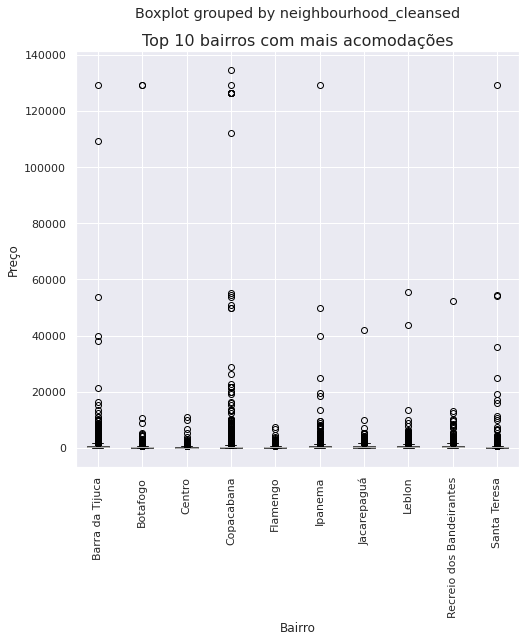

In [23]:
topNeighLis = ['Copacabana', 'Barra da Tijuca', 'Ipanema', 'Jacarepaguá', 'Botafogo', 'Recreio dos Bandeirantes', 'Leblon', 'Santa Teresa', 'Centro', 'Flamengo']
df_top_neighPrice = df_listings[df_listings['neighbourhood_cleansed'].isin(topNeighLis)]
df_top_neighPrice.boxplot("price_new", by="neighbourhood_cleansed", rot=90)
plt.title('Top 10 bairros com mais acomodações', size=16)
plt.xlabel('Bairro')
plt.ylabel('Preço')

Podemos observar que os bairros do Top 10 apresentam uma grande quantidade de outliers. Isso pode prejudicar a modelagem e no notebook onde realizaremos a modelagem, iremos fazer um tratamento desses outliers.

Text(0, 0.5, 'Preço')

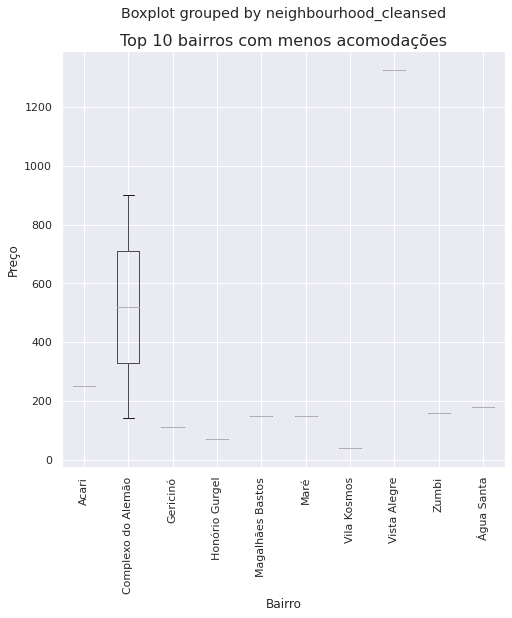

In [24]:
topNeighLis = ['Complexo do Alemão', 'Maré', 'Acari', 'Honório Gurgel', 'Água Santa', 'Zumbi', 'Magalhães Bastos', 'Vista Alegre', 'Vila Kosmos', 'Gericinó']
df_top_neighPrice = df_listings[df_listings['neighbourhood_cleansed'].isin(topNeighLis)]
df_top_neighPrice.boxplot("price_new", by="neighbourhood_cleansed", rot=90)
plt.title('Top 10 bairros com menos acomodações', size=16)
plt.xlabel('Bairro')
plt.ylabel('Preço')

Os bairros com menos acomodações estão localizados em zonas do subúrbio mais violentas e/ou mais distante dos principais pontos turístico / centro da cidade. Podemos notar que 9 dos 10 apresentam apenas 1 acomodação.

### Arquivo 'reviews.csv.gz'

In [26]:
# Visão geral do dataframe

print(df_reviews.shape)
df_reviews.head()

(323274, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,17878,64852,2010-07-15,135370,Tia,This apartment is in a perfect location -- two...
1,17878,76744,2010-08-11,10206,Mimi,we had a really great experience staying in Ma...
2,17878,91074,2010-09-06,80253,Jan,Staying in Max appartment is like living in a ...
3,17878,137528,2010-11-12,230449,Orene,In general very good and reasonable price.\r\n...
4,17878,147594,2010-12-01,219338,David,The apt was nice and in a great location only ...


In [29]:
df_reviews['listing_id'].nunique()

16657

In [30]:
df_listings['id'].nunique()

26615

In [31]:
df_reviews.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323274 entries, 0 to 323273
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     323274 non-null  int64 
 1   id             323274 non-null  int64 
 2   date           323274 non-null  object
 3   reviewer_id    323274 non-null  int64 
 4   reviewer_name  323274 non-null  object
 5   comments       323178 non-null  object
dtypes: int64(3), object(3)
memory usage: 14.8+ MB


In [32]:
df_reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         96
dtype: int64

In [33]:
df_reviews.describe()

,listing_id,id,reviewer_id
count,3.232740e+05,3.232740e+05,3.232740e+05
mean,1.488539e+07,3.816369e+08,1.139837e+08
std,1.279571e+07,2.296536e+08,1.003146e+08
min,1.787800e+04,5.063600e+04,5.000000e+00
25%,2.958465e+06,1.676957e+08,2.742065e+07
50%,1.254494e+07,4.111378e+08,8.900361e+07
75%,2.273995e+07,5.883291e+08,1.755111e+08
max,4.815668e+07,7.342457e+08,3.895024e+08


O arquivo 'reviews.csv.gz' apresenta basicamente os comentários dos hospedes sobre as acomodações.

### Arquivo 'calendar.csv.gz'

In [34]:
# Visão geral do dataframe

print(df_calendar.shape)
df_calendar.head()

(9685126, 7)


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,45766287,2021-02-23,f,$150.00,$150.00,2.0,1125.0
1,45764740,2021-02-24,f,$100.00,$100.00,1.0,4.0
2,45764740,2021-02-25,t,$100.00,$100.00,1.0,4.0
3,45764740,2021-02-26,t,$100.00,$100.00,1.0,4.0
4,45764740,2021-02-27,t,$100.00,$100.00,1.0,4.0


In [35]:
df_calendar.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9685126 entries, 0 to 9685125
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 517.2+ MB


In [36]:
df_calendar.describe()

,listing_id,minimum_nights,maximum_nights
count,9.685126e+06,9.679539e+06,9.679539e+06
mean,2.526011e+07,4.789049e+00,3.845105e+04
std,1.574155e+07,1.933257e+01,6.140597e+06
min,1.787800e+04,1.000000e+00,1.000000e+00
25%,1.218386e+07,2.000000e+00,9.000000e+01
50%,2.364867e+07,2.000000e+00,1.125000e+03
75%,4.089692e+07,4.000000e+00,1.125000e+03
max,4.827600e+07,1.000000e+03,1.000000e+09


O arquivo 'calendar.csv.gz' basicamente apresenta informações das datas de hospedagens, preços e número de noites mínimo e máximo.

## Preparação do dataset utilizado para modelagem de preços

Para modelagem dos preços das acomodações, será utilizado o dataset 'listings', pois contém importantes features que podem ser usadas para prever o preço das acomodações numa primeira análise. 

In [37]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [ ]:
df_listings_cleaned['neighbourhood_cleansed_new'] = df_listings_cleaned['neighbourhood_cleansed'].astype('category').cat.codes

# https://www.datacamp.com/community/tutorials/categorical-data
#https://towardsdatascience.com/guide-to-encoding-categorical-features-using-scikit-learn-for-machine-learning-5048997a5c79

In [40]:
df_listings_cleaned.head()

,neighbourhood_cleansed,accommodates,bathrooms_text_new,bedrooms,beds,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price_new,neighbourhood_cleansed_new
0,Copacabana,5,1.0,2.0,2.0,5,180,304,260,94.0,9.0,9.0,10.0,10.0,10.0,9.0,221.0,32
1,Ipanema,2,1.0,1.0,1.0,3,90,10,85,95.0,10.0,10.0,10.0,10.0,10.0,9.0,307.0,62
2,Copacabana,2,1.0,1.0,2.0,7,60,328,238,94.0,9.0,9.0,9.0,10.0,10.0,9.0,160.0,32
3,Ipanema,2,1.5,1.0,1.0,2,89,207,181,94.0,10.0,9.0,10.0,10.0,10.0,9.0,273.0,62
4,Copacabana,2,1.0,1.0,1.0,3,15,101,353,98.0,10.0,10.0,10.0,10.0,10.0,10.0,135.0,32


Seleção das features para análise de preço. Baseado na correlação. 

In [41]:
#sns.heatmap(df_listings_cleaned.corr(), annot=True, linewidths=0, vmin=-1, cmap="RdBu_r");
df_listings_cleaned.corr()

,accommodates,bathrooms_text_new,bedrooms,beds,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price_new,neighbourhood_cleansed_new
accommodates,1.000000,0.617691,0.727413,0.690524,0.011781,-0.005308,0.063598,-0.023960,-0.023164,-0.036870,-0.044288,-0.006267,-0.017021,-0.009253,-0.058497,0.090703,-0.007011
bathrooms_text_new,0.617691,1.000000,0.753940,0.533385,0.028374,-0.003797,0.062231,-0.071316,0.017305,-0.008909,-0.004277,-0.000117,-0.008258,-0.013914,-0.029234,0.108829,0.045933
bedrooms,0.727413,0.753940,1.000000,0.630020,0.029729,-0.004256,0.055253,-0.063852,-0.007763,-0.028796,-0.024818,-0.008431,-0.023462,-0.019600,-0.055763,0.108231,0.028306
beds,0.690524,0.533385,0.630020,1.000000,0.003240,-0.007375,0.056513,-0.016341,-0.024774,-0.034779,-0.025480,-0.011430,-0.019005,-0.020244,-0.043307,0.061970,0.017464
minimum_nights,0.011781,0.028374,0.029729,0.003240,1.000000,-0.001196,0.022940,-0.032008,-0.003767,0.000776,-0.007843,0.008484,0.007790,0.008605,-0.005815,0.009315,-0.003781
maximum_nights,-0.005308,-0.003797,-0.004256,-0.007375,-0.001196,1.000000,-0.001744,0.010073,0.000345,0.003044,0.004205,0.002054,0.002293,0.002526,-0.002219,-0.000505,0.003770
availability_365,0.063598,0.062231,0.055253,0.056513,0.022940,-0.001744,1.000000,-0.073948,-0.066294,-0.077856,-0.045492,-0.044265,-0.049010,-0.076652,-0.059045,0.006818,0.028525
number_of_reviews,-0.023960,-0.071316,-0.063852,-0.016341,-0.032008,0.010073,-0.073948,1.000000,0.056718,0.102253,0.075269,0.084860,0.075463,0.098470,0.087067,-0.029373,-0.055659
review_scores_rating,-0.023164,0.017305,-0.007763,-0.024774,-0.003767,0.000345,-0.066294,0.056718,1.000000,0.761484,0.718570,0.620707,0.690226,0.502736,0.679708,-0.020495,0.005824
review_scores_accuracy,-0.036870,-0.008909,-0.028796,-0.034779,0.000776,0.003044,-0.077856,0.102253,0.761484,1.000000,0.618645,0.627306,0.654628,0.515297,0.629530,-0.027979,-0.020288


In [38]:
df_listings_cleaned = df_listings[['neighbourhood_cleansed', 'accommodates', 'bathrooms_text_new', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location', 'review_scores_value', 'price_new']]
df_listings_cleaned.head()

,neighbourhood_cleansed,accommodates,bathrooms_text_new,bedrooms,beds,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price_new
0,Copacabana,5,1.0,2.0,2.0,5,180,304,260,94.0,9.0,9.0,10.0,10.0,10.0,9.0,221.0
1,Ipanema,2,1.0,1.0,1.0,3,90,10,85,95.0,10.0,10.0,10.0,10.0,10.0,9.0,307.0
2,Copacabana,2,1.0,1.0,2.0,7,60,328,238,94.0,9.0,9.0,9.0,10.0,10.0,9.0,160.0
3,Ipanema,2,1.5,1.0,1.0,2,89,207,181,94.0,10.0,9.0,10.0,10.0,10.0,9.0,273.0
4,Copacabana,2,1.0,1.0,1.0,3,15,101,353,98.0,10.0,10.0,10.0,10.0,10.0,10.0,135.0


In [42]:
df_listings_cleaned.to_csv('data_for_modeling.csv')